In [ ]:
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install matplotlib
!pip install statsmodels

In [ ]:
# 지도학습 모델[와인 _ 레드,화이트]
# 선형회귀 OLS
# 와인의 품질은 알코올의 영향을 많이 받는다. 정량적으로 분석, 도출.
# 와인 quality는 alcohol과 양의 상관관계를 가진다!

# fixed acidity, (고정산)
# volatile acidity,( 휘발산)
# citric acid,(구연산)
# residual sugar,(잔당)
# chlorides,(염화물)
# free sulfur dioxide,(유리 이산화황)
# total sulfur dioxide,(총 이산화황)
# density,(밀도)
# pH,
# sulphates,(황산염)
# alcohol,(알코올)

In [1]:
import pandas as pd

red_df = pd.read_csv("C:/gy/BigData/1_통계분석/winequality-red.csv",
                     sep=";", header = 0, engine = 'python')

# csv 파일 형식으로 만들기 
# index=False, 데이터프레임(DF로 표현 중) 행의 레이블을 csv에 쓰지 않음. 
red_df.to_csv("C:/gy/BigData/1_통계분석/winequality-red_gy.csv",
              index=False)

In [4]:
white_df = pd.read_csv("C:/gy/BigData/1_통계분석/winequality-white.csv",
                       sep=";", header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
white_df.to_csv("C:/gy/BigData/1_통계분석/winequality-white_gy.csv",
              index=False)

In [6]:
# 레드 와인, 
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# 화이트 와인, 
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# 데이터 병합하기. 
# 레드 와인, 화이트 와인 합치기
# 레드 와인 csv 파일에, 컬럼을 추가하기. 
# type 이라고, red, white 인지 분류를 위해서. 
# insert 특정 열 추가. 
red_df.insert(0, column="type", value="red")
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# 화이트 와인도 분류해주기.
white_df.insert(0, column="type", value="white")
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# 레드와 화이트 와인의 각 행과 열의 구조 살펴보기 (열, 행)
print("레드 :",red_df.shape," 화이트 :",white_df.shape)

레드 : (1599, 13)  화이트 : (4898, 13)


In [14]:
# 레드 , 화이트 와인 타입 열 추가 후 병합(합치기)
wine = pd.concat([red_df,white_df])

In [20]:
wine.shape

(6497, 13)

In [18]:
# csv 파일 형식으로 옮기기 
wine.to_csv("C:/gy/BigData/1_통계분석/wine.csv", index=False)

In [19]:
# 기본 정보 
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [22]:
# wine csv 파일의 헤더(컬럼 이름의 공백을 언더바로 교체 작업. )
wine.columns = wine.columns.str.replace(" ", "_")
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
#wine csv 의 간단한 설명 (기본적인 수학.. max, min 등)
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
# 레드, 화이트 두 그룹으로 나눠서 비교 해보기. 
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [25]:
# 특정의 통계 값 조회, 예 평균. 
wine.groupby("type")["quality"].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [26]:
# 평균, 표준편차, 최소값, 최대값 조회.
wine.groupby("type")["quality"].agg(["mean","std","min","max"])

,mean,std,min,max
type,,,,
red,5.636023,0.807569,3,8
white,5.877909,0.885639,3,9


In [28]:
# 기술 통계 = 요약 통계, 통계 값들을 가지고, 기본적인 분석 
# t-검정, 회귀분석 , -> 파이썬에 제공하는 함수를 이용할 예정. 
# t-검정 그룹 간의 차이를 확인 할 예정 -> scipy 패키지 이용 예정. 
# 회귀분석 -> statsmodels 라이브러리 사용할 예정. 

from scipy import stats
from statsmodels.formula.api import ols,glm

red_wine_quality = wine.loc[wine['type'] == "red", "quality"]
white_wine_quality = wine.loc[wine['type'] == "white", "quality"]

# t-검정 분석 하기. 특정의 값만을 비교. 기울기로 검정함.
# >> equal_var = False : 분산값이 같은 건 검정하지 않겠다!
stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var= False)

# 독립 변수와, 종속 변수의 나열
Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 위에서 정의한, 종속 변수(quality), 나머지 변수 독립 변수를 정리 
# 회귀 분석 함수 수행. 
# ols -> OLS(Ordinary Least Squares)
regression_result = ols(Rformula, data = wine).fit()

# 회귀 분석 요약을 출력. 
regression_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:34:43   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# 만든 회귀 분석 모델을 활용해서, 예측 해보기. quality, type 2개의 열을 제외하기. 
sample1 = wine[wine.columns.difference(["quality","type"])]
# wine
# 4행까지 저장.
sample1_2 = sample1[0:5][:]

print("0~4행까지 : \n",sample1_2)

sample1_predict = regression_result.predict(sample1_2)
# 지도학습, 답이 있는 평가 분석 방법. 
print(f"sample1_predict 앞에 만든 회귀분석 모델을 이용해서 quality 예측값 \n : {sample1_predict}")
print(f"회귀 분석 하기전에 원래의 quality 값 확인 \n : {wine[0:5]["quality"]}")

0~4행까지 : 
    alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 11.0  3.51             1.9       0.56                  34.0   
1                 25.0  3.20             2.6       0.68                  67.0   
2                 15.0  3.26             2.3       0.65                  54.0   
3                 17.0  3.16             1.9       0.58                  60.0   
4                 11.0  3.51             1.9       0.56                  34.0   

   volatile_acidity  
0              0.70  
1              0.88  
2              0.76  
3              0.28  
4              0.70

임의의 데이터!

In [31]:
# 자료의 있는 값이 아니라. 
# 임의로 우리가 독립 변수의 값을 설정해서, 모델을 이용해, 품질의 결과값 예측 해보기. 
# Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 임의의 data 만들기, 독립 변수에 예시 값 넣어보고, 모델로 예측 다시 해보기. 
data = {"fixed_acidity":[8.2, 8], "volatile_acidity":[0.7,0.5],"citric_acid" : [0.2,0.3],
        "residual_sugar":[6.0,5.7], "chlorides" : [0.045,0.040], "free_sulfur_dioxide" : [29.0,30.0], "total_sulfur_dioxide":[97.0,98.0],
        "density" : [0.955, 0.92], "pH" :[3.12,3.01], "sulphates": [0.3,0.25], "alcohol":[8.9,8.8] }

# 딕션너리(dir) -> pd 이용해서 표로 만들기(DataFrame=DF)
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.9,0.045,0.2,0.955,8.2,29.0,3.12,6.0,0.30,97.0,0.7
1,8.8,0.040,0.3,0.920,8.0,30.0,3.01,5.7,0.25,98.0,0.5


In [32]:
# 임의의 수치로 만든 data를 회귀모델에 인자값으로 넣어서, 결괏값 예측해보기. 
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    7.022545
1    9.066865
dtype: float64

C:\Users\it\AppData\Local\Temp\ipykernel_15104\4189092030.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde=True, color="red", label =" red wine")
C:\Users\it\AppData\Local\Temp\ipykernel_15104\4189092030.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_qua

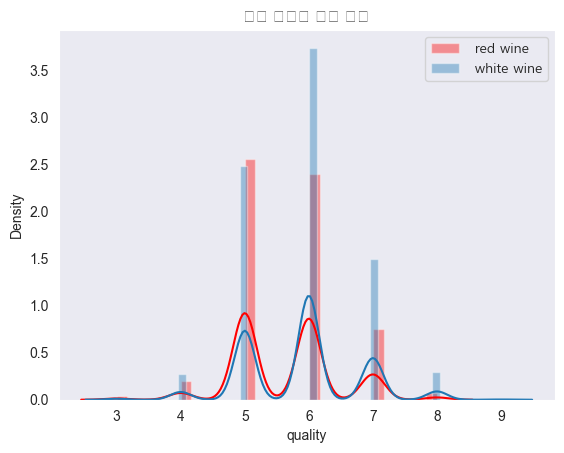

In [46]:
# 시각화에 필요한 패키지 임포트 하기. 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
# red wine 속성 설정. 
sns.distplot(red_wine_quality, kde=True, color="red", label =" red wine")

# white wine 속성 설정. 
sns.distplot(white_wine_quality, kde=True, label =" white wine")

plt.title("와인 타입에 따른 품질")

# 한글 깨짐 오류
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.legend()
plt.show()

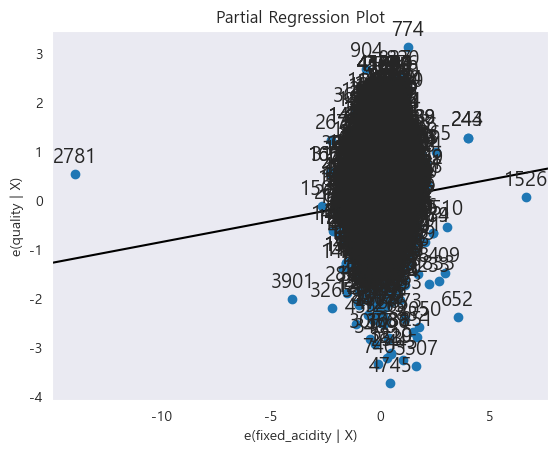

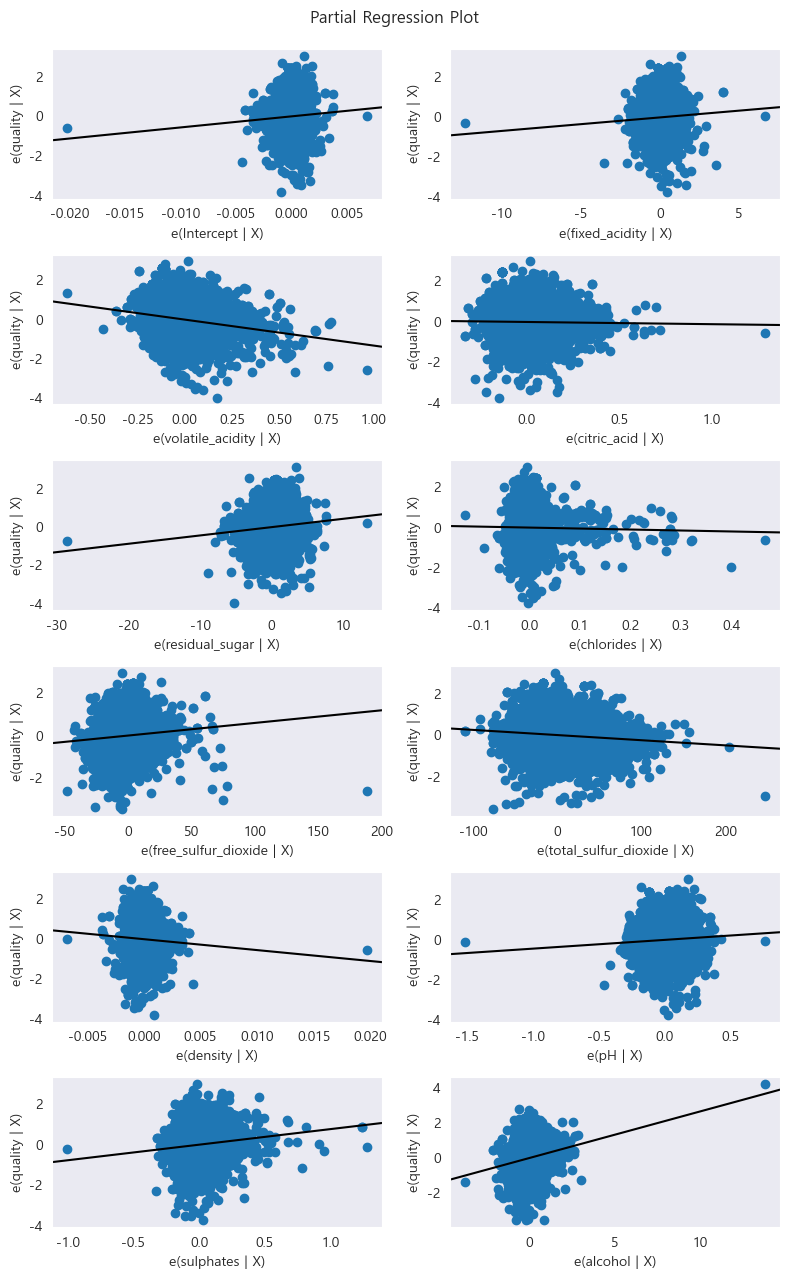

In [47]:
# 실제로 궁금했던 부분이, 어느 독립요소가, 실제 quality에 종속변수에 영향이 있는지 여부가 궁금했음. 
# 표에 답은 다 나와있었음 , 상관계수의 값으로 표기가 되었지만, 
# 시각화를 하는 이유가, 인사이트 결과를 좀더 쉽고 알아보기 편하게 하는게 주 목적. 

import statsmodels.api as sm
# wine 컬럼들에서, 종속변수 quality, 독립변수 중 하나인 fixed_acidity , 빼고 , 나머지를 필터 
others = list(set(wine.columns).difference(set(["quality","fixed_acidity"])))
# quality, fixed_acidity 두개의 상관 계수를 , 서로에게 영향이 있는지 여부이고, 
# 독립 변수 가 클수록 , 종속 변수 quality 가 ,증가 ?,. 감소? 확인, 수직선(상수, 관계없음. )
sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords =True)
plt.show()
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()